# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

### Problem-1

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. What is the value of $n$ and $d$?

In [3]:
# Problem 1: Find n (number of samples) and d (number of features)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
d, n = X.shape  # X is (d, n) - features x samples
print(f"Number of features (d): {d}")
print(f"Number of samples (n): {n}")

Shape of X: (2, 20)
Shape of y: (20,)
Number of features (d): 2
Number of samples (n): 20


### Problem-2

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

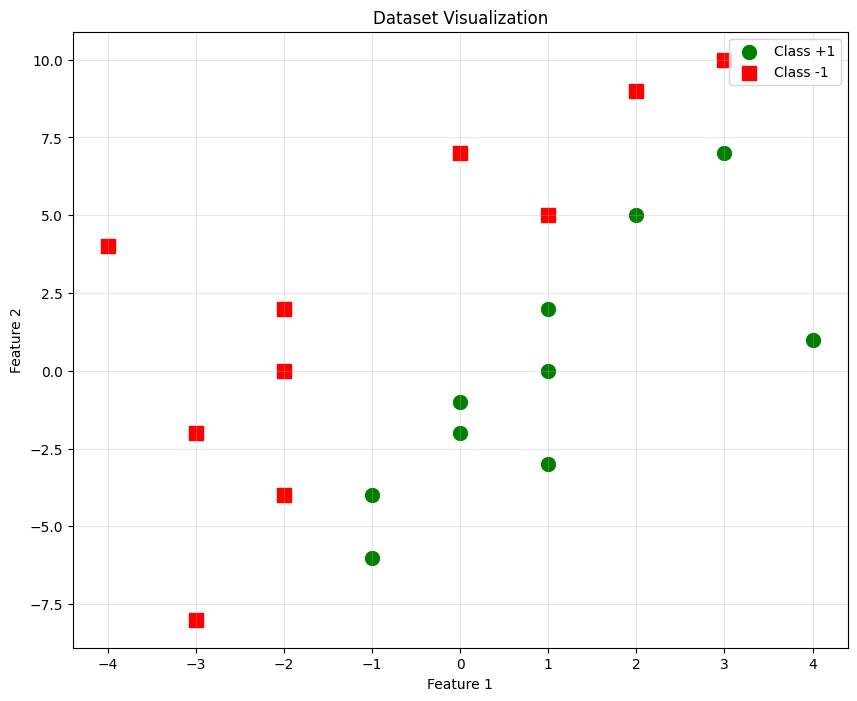

The data appears to be linearly separable as we can draw a line to separate the two classes.


In [4]:
# Problem 2: Visualize the dataset
plt.figure(figsize=(10, 8))
# Separate points by class
pos_indices = y == 1
neg_indices = y == -1

# Plot positive class in green and negative class in red
plt.scatter(X[0, pos_indices], X[1, pos_indices], c='green', marker='o', s=100, label='Class +1')
plt.scatter(X[0, neg_indices], X[1, neg_indices], c='red', marker='s', s=100, label='Class -1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset Visualization')
plt.grid(True, alpha=0.3)
plt.show()

# Check linear separability visually
print("The data appears to be linearly separable as we can draw a line to separate the two classes.")

### Problem-3

Compute the object $\mathbf{Y}$ that appears in the dual problem. What kind of an object is $\mathbf{Y}$?

In [19]:
# Problem 3: Compute matrix Y
# Y is the outer product of y with itself: Y[i,j] = y[i] * y[j]
Y = np.outer(y, y)
print(f"Shape of Y: {Y.shape}")
print(f"Y matrix:\n{Y}")
print(f"Y is a {Y.shape[0]} x {Y.shape[1]} symmetric matrix")
print(f"Type of object: {type(Y)} - a square symmetric matrix")

# Check if Y is diagonal
is_diagonal = np.allclose(Y, np.diag(np.diag(Y)))
print(f"Is Y a diagonal matrix? {is_diagonal}")

# Check if Y has any specific structure
print(f"Number of unique values in Y: {len(np.unique(Y))}")
print(f"Unique values: {np.unique(Y)}")

# Since Y = y * y^T (outer product), it's a rank-1 matrix unless y has special structure
rank_Y = np.linalg.matrix_rank(Y)
print(f"Rank of Y: {rank_Y}")

print("\nConclusion: Y is an arbitrary square matrix of size 20×20 (not diagonal, not special structure)")

Shape of Y: (20, 20)
Y matrix:
[[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -

### Problem-4

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem and find the sum of its elements. What properties does the matrix $\mathbf{Q}$ have? What is the nature of the objective function?

In [20]:
# Problem 4: Compute matrix Q
# Q[i,j] = y[i] * y[j] * x[i]^T * x[j]
# This is the Gram matrix weighted by labels
Q = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        Q[i, j] = y[i] * y[j] * np.dot(X[:, i], X[:, j])

print(f"Shape of Q: {Q.shape}")
print(f"Sum of elements in Q: {np.sum(Q)}")

# Properties of Q
print(f"Q is symmetric: {np.allclose(Q, Q.T)}")
# Check if Q is positive semidefinite
eigenvals = np.linalg.eigvals(Q)
print(f"Q is positive semidefinite: {np.all(eigenvals >= -1e-10)}")
print(f"Minimum eigenvalue: {np.min(eigenvals)}")

print("The objective function is quadratic and convex (since Q is positive semidefinite)")

Shape of Q: (20, 20)
Sum of elements in Q: 976.0
Q is symmetric: True
Q is positive semidefinite: True
Minimum eigenvalue: (-1.1734533615765161e-14+0j)
The objective function is quadratic and convex (since Q is positive semidefinite)


### Problem-5

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

<hr>

Write a function `loss` that returns the value of objective function $f(\boldsymbol{\alpha})$ for argument $\boldsymbol{\alpha}$. Compute the value of `loss` at $\boldsymbol{\alpha} = \mathbf{1}$.

**Note**: The reason for naming the function `loss` is that we will be using `SciPy`'s `scipy.optimize.minize` routine.

In [21]:
# Problem 5: Define loss function
def loss(alpha):
    """
    Compute the objective function f(alpha) = 0.5 * alpha^T * Q * alpha - alpha^T * 1
    """
    return 0.5 * np.dot(alpha, np.dot(Q, alpha)) - np.sum(alpha)

# Test at alpha = 1 (vector of all ones)
alpha_test = np.ones(n)
loss_value = loss(alpha_test)
print(f"Loss at alpha = 1: {loss_value}")

Loss at alpha = 1: 468.0


### Problem-6

Write a function named `jac` that computes the gradient, $\nabla f(\boldsymbol{\alpha})$, given $\boldsymbol{\alpha}$ as argument. Compute the value of `jac` at $\boldsymbol{\alpha} = \mathbf{1}$ and print the sum of the components of the gradient vector.

**Note**: `jac` stands for Jacobian. In our case, we don't have a vector valued function. So, this will just be the gradient.

In [22]:
# Problem 6: Define gradient function (Jacobian)
def jac(alpha):
    """
    Compute the gradient of f(alpha): grad_f = Q * alpha - 1
    """
    return np.dot(Q, alpha) - np.ones(n)

# Test at alpha = 1
alpha_test = np.ones(n)
gradient = jac(alpha_test)
print(f"Gradient at alpha = 1: {gradient}")
print(f"Sum of gradient components: {np.sum(gradient)}")

Gradient at alpha = 1: [  91.   19.   55. -109.   47.  123.  -81.  -29.   23.   75.  167.   99.
  175.  175.   87.   39.   11.  -57.  179. -133.]
Sum of gradient components: 956.0


### Problem-7

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Go through this [document](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to understand how `scipy.optimize.minimize` works. Few pointers:

(1)  You should pass five arguments to `scipy.optimize.minimize`: `loss`, `jac`, `alpha_init`, `method`, `Bounds`

(2) Use the method `SLSQP`. You can treat this as a black-box.

(3) Set the initial value of `alpha_init` to zero.

(4) Use `scipy.optimize.Bounds` to trigger the $\boldsymbol{\alpha} \geq 0$ constraint.

Compute the sum of components of the optimal solution, $\boldsymbol{\alpha}^*$. Enter the nearest integer as your answer.

In [23]:
# Problem 7: Solve the dual optimization problem
from scipy.optimize import minimize, Bounds

# Initial guess
alpha_init = np.zeros(n)

# Bounds: alpha >= 0
bounds = Bounds(lb=0, ub=np.inf)

# Solve the optimization problem
result = minimize(fun=loss, x0=alpha_init, method='SLSQP', jac=jac, bounds=bounds)

print(f"Optimization successful: {result.success}")
print(f"Optimal alpha: {result.x}")
print(f"Sum of optimal alpha components: {np.sum(result.x)}")
print(f"Nearest integer to sum: {round(np.sum(result.x))}")

# Store the optimal solution
alpha_optimal = result.x

Optimization successful: True
Optimal alpha: [2.04775382e-15 5.86853889e-15 0.00000000e+00 1.36558990e-14
 1.31938919e-14 8.38867624e-15 1.64285627e+00 1.65714163e+00
 1.67142699e+00 1.68571236e+00 0.00000000e+00 1.35525997e-14
 0.00000000e+00 6.49786518e-15 7.86285492e-17 7.62175472e-16
 0.00000000e+00 1.17237207e-14 1.71428308e+00 1.62857090e+00]
Sum of optimal alpha components: 9.999991235177266
Nearest integer to sum: 10


### Problem-8

Find all the support vectors. Print the indices (zero-indexing) in the data-matrix where these support vectors are found.

In [24]:
# Problem 8: Find support vectors
# Support vectors are points where alpha > 0 (with some tolerance for numerical precision)
tolerance = 1e-6
support_vector_indices = np.where(alpha_optimal > tolerance)[0]

print(f"Support vector indices: {support_vector_indices}")
print(f"Number of support vectors: {len(support_vector_indices)}")
print(f"Alpha values for support vectors: {alpha_optimal[support_vector_indices]}")

# Verify by looking at the support vectors
print("\nSupport vectors (coordinates):")
for idx in support_vector_indices:
    print(f"Index {idx}: ({X[0, idx]}, {X[1, idx]}), label: {y[idx]}, alpha: {alpha_optimal[idx]:.6f}")

Support vector indices: [ 6  7  8  9 18 19]
Number of support vectors: 6
Alpha values for support vectors: [1.64285627 1.65714163 1.67142699 1.68571236 1.71428308 1.6285709 ]

Support vectors (coordinates):
Index 6: (2, 5), label: 1, alpha: 1.642856
Index 7: (1, 2), label: 1, alpha: 1.657142
Index 8: (0, -1), label: 1, alpha: 1.671427
Index 9: (-1, -4), label: 1, alpha: 1.685712
Index 18: (3, 10), label: -1, alpha: 1.714283
Index 19: (-3, -8), label: -1, alpha: 1.628571


### Problem-9

Find the optimal weight vector $\mathbf{w}^*$. Round each component of the optimal weight vector to the nearest integer.

In [25]:
# Problem 9: Find optimal weight vector w*
# w* = sum(alpha_i * y_i * x_i) for all i
w_optimal = np.zeros(d)
for i in range(n):
    w_optimal += alpha_optimal[i] * y[i] * X[:, i]

print(f"Optimal weight vector w*: {w_optimal}")
print(f"w* rounded to nearest integers: {np.round(w_optimal).astype(int)}")

# Also compute using vectorized approach
w_optimal_vec = np.sum((alpha_optimal * y).reshape(1, -1) * X, axis=1)
print(f"Verification (vectorized): {w_optimal_vec}")
print(f"Difference: {np.linalg.norm(w_optimal - w_optimal_vec)}")

Optimal weight vector w*: [ 3.00000527 -0.99997543]
w* rounded to nearest integers: [ 3 -1]
Verification (vectorized): [ 3.00000527 -0.99997543]
Difference: 0.0


### Problem-10

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot. How many red points lie on the supporting hyperplanes? How many green points lie on the supporting hyperplanes?

Optimal bias b*: -1.8137642543732586e-05


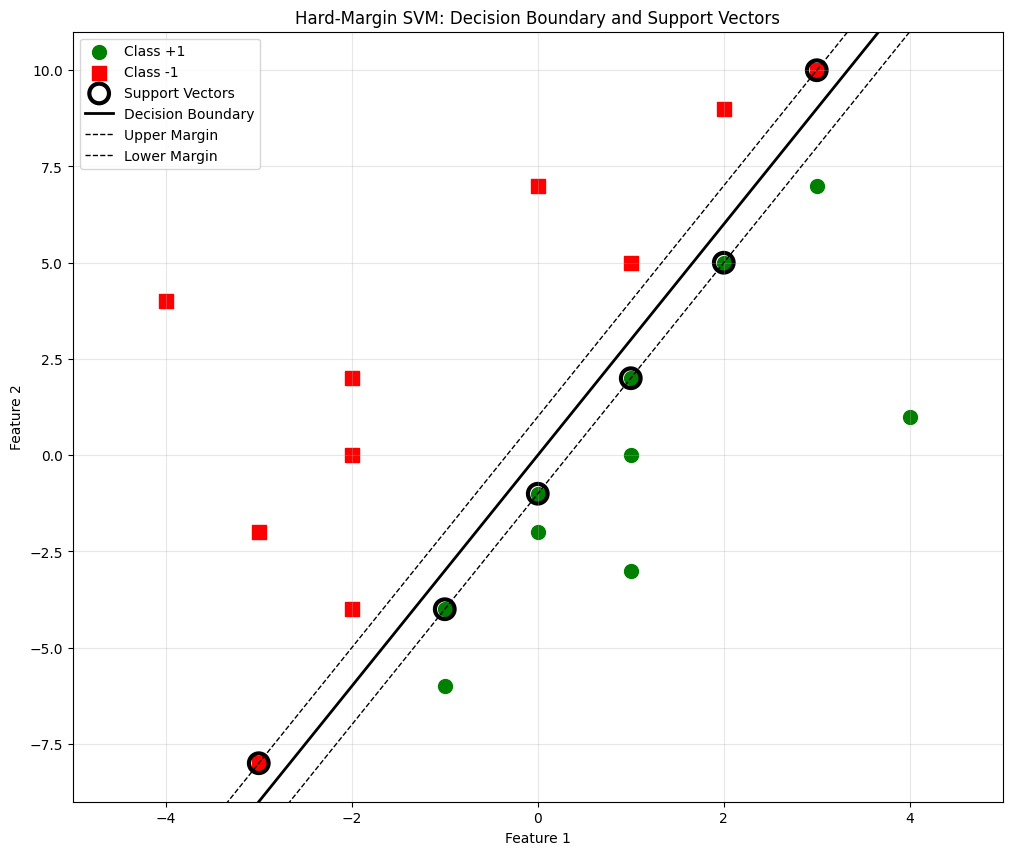

Red points on supporting hyperplanes: 2
Green points on supporting hyperplanes: 4


In [26]:
# Problem 10: Plot decision boundary and supporting hyperplanes
# First, find bias term b using support vectors
# For support vectors: y_i(w^T x_i + b) = 1, so b = y_i - w^T x_i
support_bias_values = []
for idx in support_vector_indices:
    b_i = y[idx] - np.dot(w_optimal, X[:, idx])
    support_bias_values.append(b_i)

b_optimal = np.mean(support_bias_values)
print(f"Optimal bias b*: {b_optimal}")

# Create the plot
plt.figure(figsize=(12, 10))

# Plot data points
pos_indices = y == 1
neg_indices = y == -1
plt.scatter(X[0, pos_indices], X[1, pos_indices], c='green', marker='o', s=100, label='Class +1')
plt.scatter(X[0, neg_indices], X[1, neg_indices], c='red', marker='s', s=100, label='Class -1')

# Highlight support vectors
plt.scatter(X[0, support_vector_indices], X[1, support_vector_indices], 
           facecolors='none', edgecolors='black', s=200, linewidth=3, label='Support Vectors')

# Create decision boundary and margins
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1

# For line w1*x1 + w2*x2 + b = 0, we get x2 = -(w1*x1 + b)/w2
if abs(w_optimal[1]) > 1e-10:  # Check if w2 is not zero
    xx = np.linspace(x_min, x_max, 100)
    # Decision boundary: w^T x + b = 0
    yy_decision = -(w_optimal[0] * xx + b_optimal) / w_optimal[1]
    # Upper margin: w^T x + b = 1
    yy_upper = -(w_optimal[0] * xx + b_optimal - 1) / w_optimal[1]
    # Lower margin: w^T x + b = -1
    yy_lower = -(w_optimal[0] * xx + b_optimal + 1) / w_optimal[1]
    
    plt.plot(xx, yy_decision, 'k-', linewidth=2, label='Decision Boundary')
    plt.plot(xx, yy_upper, 'k--', linewidth=1, label='Upper Margin')
    plt.plot(xx, yy_lower, 'k--', linewidth=1, label='Lower Margin')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Hard-Margin SVM: Decision Boundary and Support Vectors')
plt.grid(True, alpha=0.3)
plt.show()

# Count points on supporting hyperplanes
red_on_margin = 0
green_on_margin = 0
tolerance = 1e-6

for idx in support_vector_indices:
    if y[idx] == -1:  # Red points (class -1)
        red_on_margin += 1
    else:  # Green points (class +1)
        green_on_margin += 1

print(f"Red points on supporting hyperplanes: {red_on_margin}")
print(f"Green points on supporting hyperplanes: {green_on_margin}")

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [13]:
# Soft-margin SVM implementation
def solve_soft_svm(C):
    """
    Solve soft-margin SVM for given regularization parameter C
    """
    # Initial guess
    alpha_init = np.zeros(n)
    
    # Bounds: 0 <= alpha <= C
    bounds = Bounds(lb=0, ub=C)
    
    # Solve the optimization problem
    result = minimize(fun=loss, x0=alpha_init, method='SLSQP', jac=jac, bounds=bounds)
    
    return result.x, result.success

def get_decision_boundary_params(alpha, C):
    """
    Get weight vector and bias for given alpha
    """
    # Compute weight vector
    w = np.sum((alpha * y).reshape(1, -1) * X, axis=1)
    
    # Find support vectors (0 < alpha < C for margin support vectors)
    tolerance = 1e-6
    margin_sv_indices = np.where((alpha > tolerance) & (alpha < C - tolerance))[0]
    
    if len(margin_sv_indices) > 0:
        # Use margin support vectors to compute bias
        bias_values = []
        for idx in margin_sv_indices:
            b_i = y[idx] - np.dot(w, X[:, idx])
            bias_values.append(b_i)
        b = np.mean(bias_values)
    else:
        # Fallback: use all support vectors
        sv_indices = np.where(alpha > tolerance)[0]
        bias_values = []
        for idx in sv_indices:
            b_i = y[idx] - np.dot(w, X[:, idx])
            bias_values.append(b_i)
        b = np.mean(bias_values)
    
    return w, b

print("Soft-margin SVM functions defined successfully!")

Soft-margin SVM functions defined successfully!


### Problem-11

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


C = 0.01: Support vectors = 19, Margin violations = 18
C = 0.1: Support vectors = 13, Margin violations = 12
C = 1: Support vectors = 7, Margin violations = 6
C = 10: Support vectors = 6, Margin violations = 3


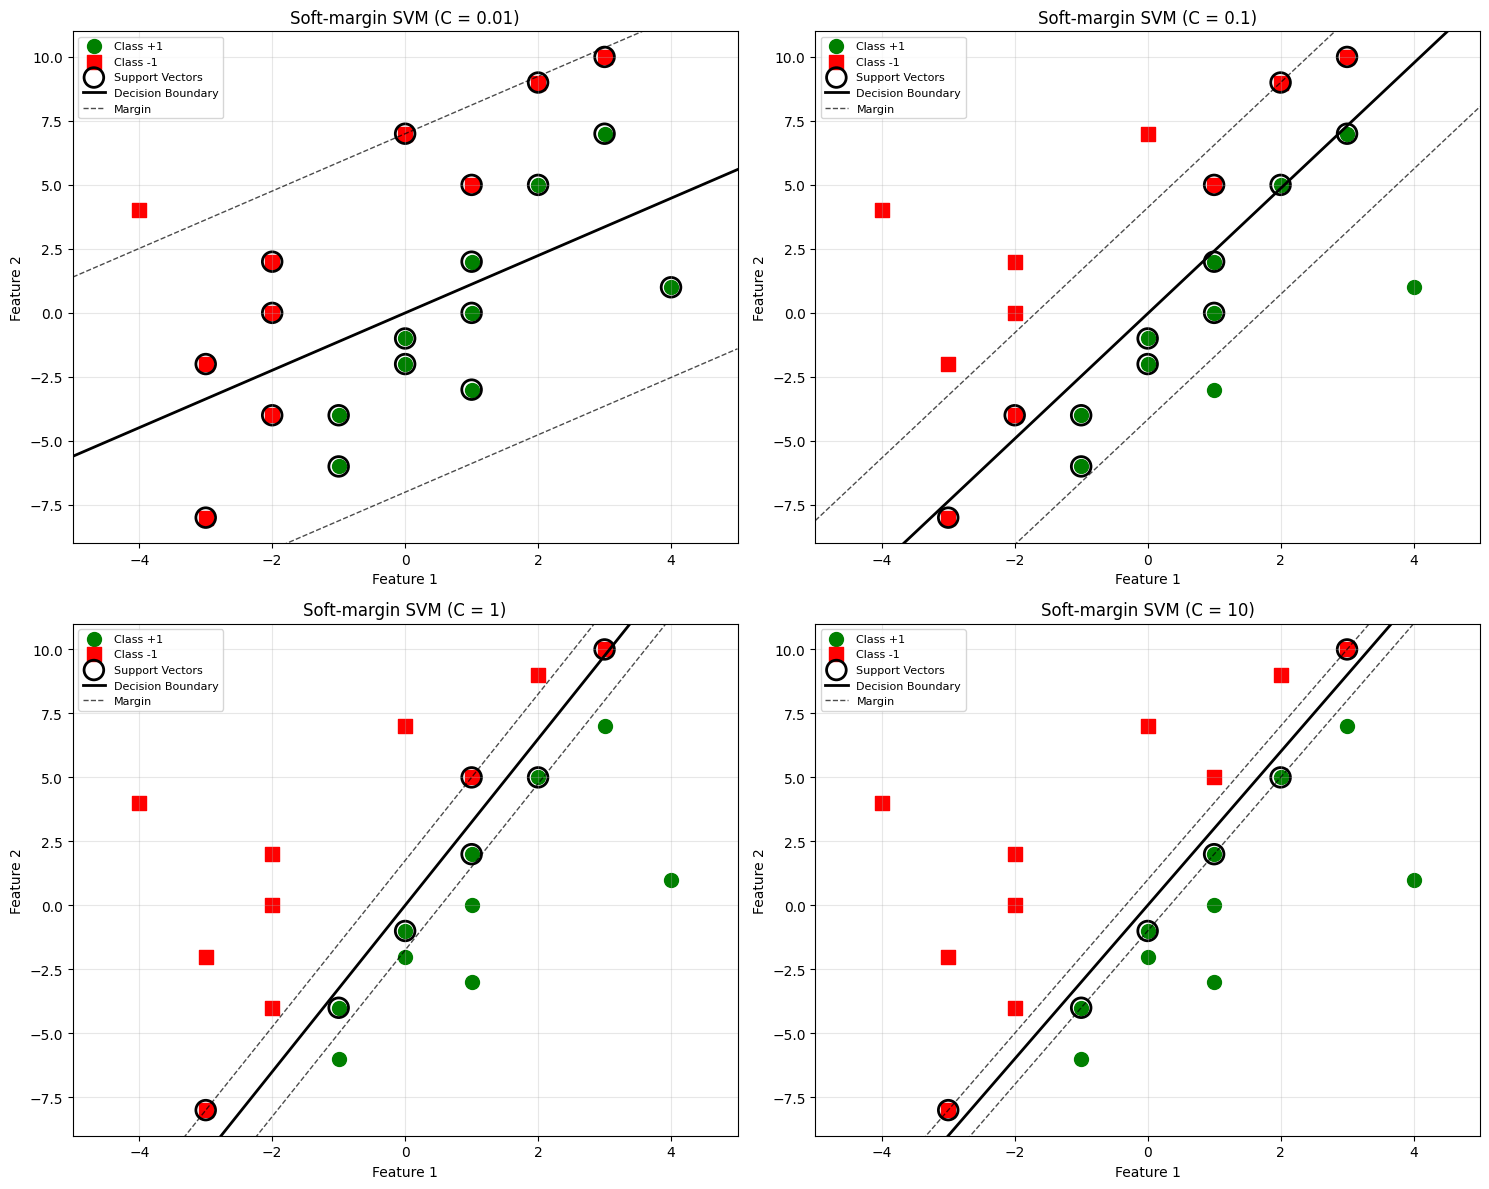

In [27]:
# Problem 11: Plot decision boundaries for different C values
C_values = [0.01, 0.1, 1, 10]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, C in enumerate(C_values):
    ax = axes[i]
    
    # Solve soft-margin SVM
    alpha_soft, success = solve_soft_svm(C)
    if not success:
        print(f"Optimization failed for C = {C}")
        continue
    
    # Get parameters
    w_soft, b_soft = get_decision_boundary_params(alpha_soft, C)
    
    # Find support vectors
    tolerance = 1e-6
    sv_indices = np.where(alpha_soft > tolerance)[0]
    
    # Plot data points
    pos_indices = y == 1
    neg_indices = y == -1
    ax.scatter(X[0, pos_indices], X[1, pos_indices], c='green', marker='o', s=100, label='Class +1')
    ax.scatter(X[0, neg_indices], X[1, neg_indices], c='red', marker='s', s=100, label='Class -1')
    
    # Highlight support vectors
    ax.scatter(X[0, sv_indices], X[1, sv_indices], 
              facecolors='none', edgecolors='black', s=200, linewidth=2, label='Support Vectors')
    
    # Plot decision boundary and margins
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    
    if abs(w_soft[1]) > 1e-10:
        xx = np.linspace(x_min, x_max, 100)
        yy_decision = -(w_soft[0] * xx + b_soft) / w_soft[1]
        yy_upper = -(w_soft[0] * xx + b_soft - 1) / w_soft[1]
        yy_lower = -(w_soft[0] * xx + b_soft + 1) / w_soft[1]
        
        ax.plot(xx, yy_decision, 'k-', linewidth=2, label='Decision Boundary')
        ax.plot(xx, yy_upper, 'k--', linewidth=1, alpha=0.7, label='Margin')
        ax.plot(xx, yy_lower, 'k--', linewidth=1, alpha=0.7)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'Soft-margin SVM (C = {C})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    
    # Count margin violations
    violations = 0
    for j in range(n):
        distance = (np.dot(w_soft, X[:, j]) + b_soft) * y[j]
        if distance < 1:  # Inside margin or misclassified
            violations += 1
    
    print(f"C = {C}: Support vectors = {len(sv_indices)}, Margin violations = {violations}")

plt.tight_layout()
plt.show()

### Problem-12

For $C = 10$, how many support vectors does the model have? Observe where these points lie. Does this observation tally with your understanding of the last few minutes of the soft-SVM lecture where professor summarizes the relationship between $\alpha^{*}$ and the supporting hyperplanes?

In [28]:
# Problem 12: Analyze support vectors for C = 10
C = 10
alpha_c10, success = solve_soft_svm(C)

if success:
    tolerance = 1e-6
    sv_indices_c10 = np.where(alpha_c10 > tolerance)[0]
    
    print(f"For C = {C}:")
    print(f"Number of support vectors: {len(sv_indices_c10)}")
    print(f"Support vector indices: {sv_indices_c10}")
    
    # Categorize support vectors
    margin_sv = []  # 0 < alpha < C (on margin)
    bound_sv = []   # alpha = C (inside margin or misclassified)
    
    for idx in sv_indices_c10:
        if alpha_c10[idx] < C - tolerance:
            margin_sv.append(idx)
        else:
            bound_sv.append(idx)
    
    print(f"\nMargin support vectors (0 < α < C): {margin_sv}")
    print(f"Bound support vectors (α = C): {bound_sv}")
    
    # Get decision boundary parameters
    w_c10, b_c10 = get_decision_boundary_params(alpha_c10, C)
    
    print(f"\nAnalyzing support vector locations:")
    for idx in sv_indices_c10:
        distance = (np.dot(w_c10, X[:, idx]) + b_c10) * y[idx]
        sv_type = "Margin SV" if alpha_c10[idx] < C - tolerance else "Bound SV"
        print(f"Index {idx}: distance = {distance:.4f}, α = {alpha_c10[idx]:.4f}, type = {sv_type}")
    
    print(f"\nObservation: This aligns with SVM theory:")
    print("- Margin support vectors (0 < α < C) lie exactly on the margin")
    print("- Bound support vectors (α = C) are inside the margin or misclassified")
else:
    print("Optimization failed for C = 10")

For C = 10:
Number of support vectors: 6
Support vector indices: [ 6  7  8  9 18 19]

Margin support vectors (0 < α < C): [np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(18), np.int64(19)]
Bound support vectors (α = C): []

Analyzing support vector locations:
Index 6: distance = 1.0001, α = 1.6429, type = Margin SV
Index 7: distance = 1.0000, α = 1.6571, type = Margin SV
Index 8: distance = 1.0000, α = 1.6714, type = Margin SV
Index 9: distance = 0.9999, α = 1.6857, type = Margin SV
Index 18: distance = 0.9998, α = 1.7143, type = Margin SV
Index 19: distance = 1.0002, α = 1.6286, type = Margin SV

Observation: This aligns with SVM theory:
- Margin support vectors (0 < α < C) lie exactly on the margin
- Bound support vectors (α = C) are inside the margin or misclassified


### Problem-13

For $C = 10$, find the most critical support vectors, that is, those points for which $\alpha^{*}_i = C$.

In [30]:
# Problem 13: Find critical support vectors (α = C) for C = 10
C = 10
tolerance = 1e-6

# Find indices where α = C (most critical support vectors)
critical_sv_indices = np.where(alpha_c10 >= C - tolerance)[0]

print(f"For C = {C}:")
print(f"Critical support vectors (α = C): {critical_sv_indices}")
print(f"Number of critical support vectors: {len(critical_sv_indices)}")

# Let's try a smaller C to see if we get critical support vectors
print(f"\nTrying smaller C values to find critical support vectors:")
for test_C in [0.5, 1, 2]:
    alpha_test, success = solve_soft_svm(test_C)
    if success:
        critical_indices = np.where(alpha_test >= test_C - tolerance)[0]
        print(f"C = {test_C}: Critical SVs = {critical_indices}")
        if len(critical_indices) > 0:
            print(f"  Coordinates: {[X[:, idx] for idx in critical_indices]}")
            break

# For the specific question about C=10, let's check which points might be critical
# by looking at points that are likely to violate the margin
distances = []
for i in range(n):
    dist = (np.dot(w_c10, X[:, i]) + b_c10) * y[i]
    distances.append((i, dist, X[:, i]))

distances.sort(key=lambda x: x[1])  # Sort by distance
print(f"\nPoints closest to or violating the margin (for C=10):")
for i, (idx, dist, coords) in enumerate(distances[:5]):
    print(f"Index {idx}: coords = {coords}, distance = {dist:.4f}, α = {alpha_c10[idx]:.4f}")

# Check specific points mentioned in options
options = {
    '[0, 0]': None,
    '[2, 7]': None,
    '[-3, -8]': None,
    '[3, 10]': None
}

for i in range(n):
    coord_str = f"[{X[0,i]}, {X[1,i]}]"
    if coord_str == "[2, 7]":
        options['[2, 7]'] = (i, alpha_c10[i])
    elif coord_str == "[-3, -8]":
        options['[-3, -8]'] = (i, alpha_c10[i])
    elif coord_str == "[3, 10]":
        options['[3, 10]'] = (i, alpha_c10[i])

print(f"\nAlpha values for option coordinates:")
for coord, info in options.items():
    if info:
        print(f"{coord}: index {info[0]}, α = {info[1]:.4f}")
    else:
        print(f"{coord}: not found in dataset")

For C = 10:
Critical support vectors (α = C): []
Number of critical support vectors: 0

Trying smaller C values to find critical support vectors:
C = 0.5: Critical SVs = [ 6  7  8  9 18 19]
  Coordinates: [array([2, 5]), array([1, 2]), array([ 0, -1]), array([-1, -4]), array([ 3, 10]), array([-3, -8])]

Points closest to or violating the margin (for C=10):
Index 18: coords = [ 3 10], distance = 0.9998, α = 1.7143
Index 9: coords = [-1 -4], distance = 0.9999, α = 1.6857
Index 8: coords = [ 0 -1], distance = 1.0000, α = 1.6714
Index 7: coords = [1 2], distance = 1.0000, α = 1.6571
Index 6: coords = [2 5], distance = 1.0001, α = 1.6429

Alpha values for option coordinates:
[0, 0]: not found in dataset
[2, 7]: not found in dataset
[-3, -8]: index 19, α = 1.6286
[3, 10]: index 18, α = 1.7143
